In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = 'spectrum.txt'
column_names = ["Длина_волны", "Интенсивность"]
df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, names=column_names)


<Axes: xlabel='Длина_волны'>

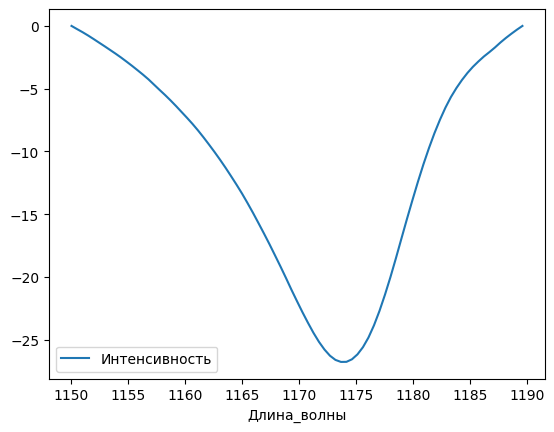

In [2]:
slice_borders = (1150, 1190)
lower_bound, upper_bound = sorted(slice_borders)
        
# Фильтрация DataFrame
filtered_df = df[(df["Длина_волны"] >= lower_bound) & (df["Длина_волны"] <= upper_bound)].copy()

# Вычисление уравнения прямой
start_point = filtered_df.iloc[0]
end_point = filtered_df.iloc[-1]
m = (end_point["Интенсивность"] - start_point["Интенсивность"]) / (end_point["Длина_волны"] - start_point["Длина_волны"])
c = start_point["Интенсивность"] - m * start_point["Длина_волны"]

# Нахождение максимального значения для горизонтальной линии
max_value = filtered_df["Интенсивность"].max()

# Корректировка значений
filtered_df["Интенсивность"] = filtered_df.apply(
    lambda row: row["Интенсивность"] - (m * row["Длина_волны"] + c) + max_value, axis=1)

filtered_df["Интенсивность"] = filtered_df["Интенсивность"] + (100 - filtered_df["Интенсивность"].max())

filtered_df["Интенсивность"] = filtered_df["Интенсивность"] - filtered_df["Интенсивность"].max()
filtered_df.plot("Длина_волны", "Интенсивность")

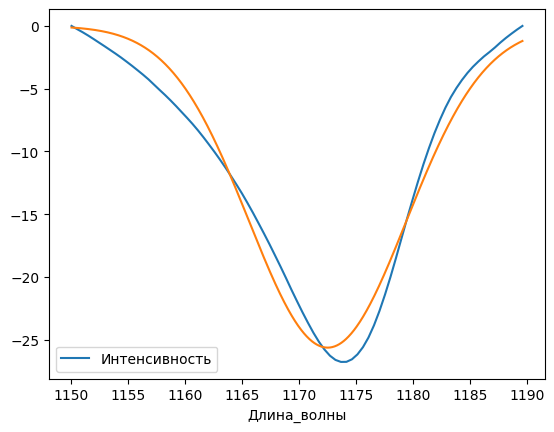

In [3]:
def gaussian(x: np.ndarray, h: float, z: float, w: float) -> np.ndarray:        
    return h * np.exp(-((x - z) ** 2) / (2 * w ** 2))

coords = {
    'height':-25.63087444,
    'center':1172.52982558,
    'width':6.90036759
}
x = np.linspace(min(filtered_df["Длина_волны"]), max(filtered_df["Длина_волны"]), 1000)
y = gaussian(x, coords['height'], coords['center'], coords['width'])

filtered_df.plot("Длина_волны", "Интенсивность")
plt.plot(x, y)

In [4]:


params = list(coords.values())

In [5]:
from scipy.optimize import curve_fit

def fit_function(x, *params):
    return peaks(x, params)

def peaks(x: np.array, params: tuple) -> np.array:
    y = np.zeros_like(x)
    i = 0
    h = params[3*i]
    z = params[3*i+1]
    w = params[3*i+2]            
    y = y + gaussian(x, h, z, w)
    return y
            
params = list(coords.values())
x_values = filtered_df["Длина_волны"]
y_values = filtered_df["Интенсивность"]
popt, _ = curve_fit(fit_function, x_values, y_values, p0=params, maxfev=800, method='trf')

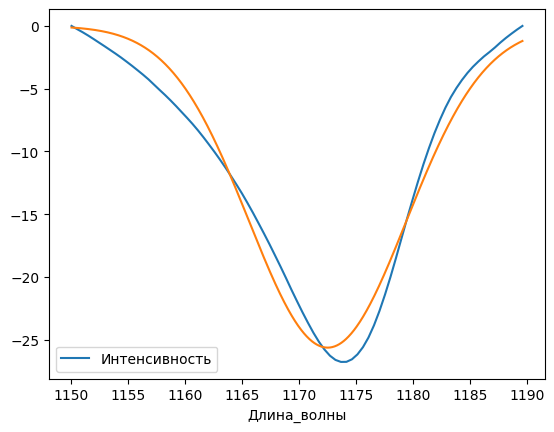

In [6]:
x = np.linspace(min(filtered_df["Длина_волны"]), max(filtered_df["Длина_волны"]), 1000)
y = gaussian(x, coords['height'], coords['center'], coords['width'])

filtered_df.plot("Длина_волны", "Интенсивность")
plt.plot(x, y)

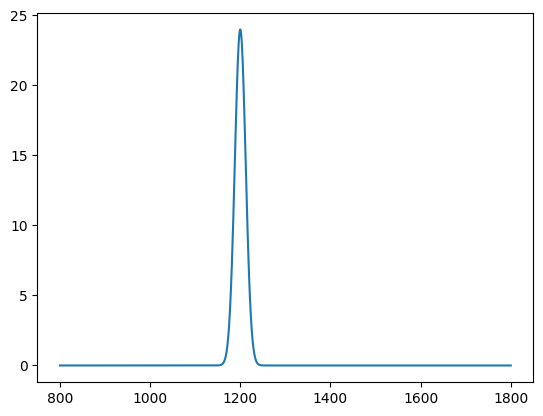

In [18]:
gaussian_params = pd.DataFrame(columns=['Height', 'Position', 'Width'])
new_row = pd.DataFrame({'Height': [24],
                                    'Position': [1200],
                                    'Width': [12]})
gaussian_params = pd.concat([gaussian_params, new_row], ignore_index=True)
new_row = pd.DataFrame({'Height': [28],
                                    'Position': [1020],
                                    'Width': [16]})
gaussian_params = pd.concat([gaussian_params, new_row], ignore_index=True)
new_row = pd.DataFrame({'Height': [23],
                                    'Position': [1564],
                                    'Width': [12]})
gaussian_params = pd.concat([gaussian_params, new_row], ignore_index=True)
x_data = np.linspace(800, 1800, 1000)
plt.plot(x_data, gaussian_params.apply(lambda x: gaussian(x_data, *x), axis=1)[0])

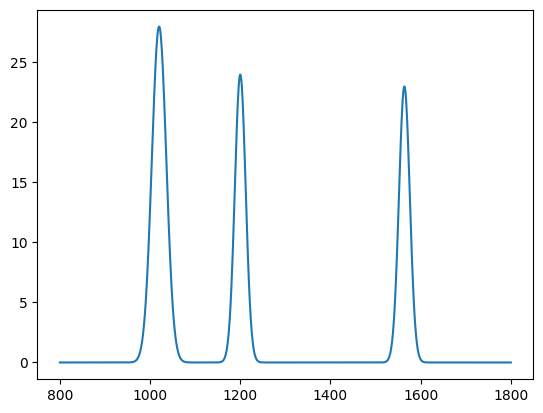

In [21]:
plt.plot(x_data, gaussian_params.apply(lambda x: gaussian(x_data, *x), axis=1).sum())